In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using BAT
using HDF5
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements

In [2]:
# ENV["JULIA_DEBUG"] = "BAT"

In [3]:
include("../src/utill.jl")

corner_plots (generic function with 1 method)

In [51]:
images = load("../data/experiment/dataset_2/m2/simulated_events.jld2")["array"];
conv_mat = load("../data/experiment/dataset_2/m2/conv_matrix.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_3"],
)

event = images[2];

In [52]:
w_matrix = [2796.6687504333886 -2157.5584907640136 1277.487896352061 -782.1950963201589 3675.114844314016; 
    0.0 3947.455327674194 -452.35767604742233 1480.4663772813328 4844.110449919116; 
    0.0 0.0 118.32696991007101 -21.241230488109675 27.92291236159994; 
    0.0 0.0 0.0 111.38691346524664 37.04564358056138; 
    0.0 0.0 0.0 0.0 176.63935161792628]

w_mean = [0.15142985755310626, 0.15144247124687812, 4.024489411714067, 4.02273292616291, 2.872765633156484]

param_truth = (
        tr_size = [-3.9988379363434317, -2.6090895042184394],
        ang_spr = [-4.071870659603584, -3.0290678553053123],
        s_waist = [-8.957691435675567,],
        μ_x = [35,35,20,35], 
        μ_y = [35,35,20,35], 
        σ_x = [0,0,0,0], 
        σ_y = [0,0,0,0], 
        δ_x = [0.0271,0.0216,0.114,3*0.0303], 
        δ_y = [0.0305,0.0234,0.125,3*0.0298],
        int_coeff  = [35147.44, 50235.06, 10096.64, 33406.9],
        s_cam = [0.0, 1.478, 15.026, 23.1150], 
    );


In [53]:
β_min = 0.8
β_max = 1.2

# tr_size = [-129.84404628805703..121.8402210460719, -275.4372053117127..268.06683020020364],
# ang_spr = [-207.87553248588253..211.7747403160637, -545.3175460315578..227.1797153898545],
# s_waist = [-633.7789367899003..496.9872316290606,],

# tr_size = [β_max*param_truth.tr_size[1]..β_min*param_truth.tr_size[1], β_max*param_truth.tr_size[2]..β_min*param_truth.tr_size[2]],
# ang_spr = [β_max*param_truth.ang_spr[1]..β_min*param_truth.ang_spr[1], β_max*param_truth.ang_spr[2]..β_min*param_truth.ang_spr[2]],
# s_waist = [β_max*param_truth.s_waist[1]..β_min*param_truth.s_waist[1],],

prior = NamedTupleDist(
        tr_size = [-129.84404628805703..121.8402210460719, -275.4372053117127..268.06683020020364],
        ang_spr = [-207.87553248588253..211.7747403160637, -545.3175460315578..227.1797153898545],
        s_waist = [-633.7789367899003..496.9872316290606,],
        μ_x = [35,35,20,35], 
        μ_y = [35,35,20,35], 
        σ_x = [0,0,0,0], 
        σ_y = [0,0,0,0], 
        δ_x = [0.0271,0.0216,0.114,3*0.0303], 
        δ_y = [0.0305,0.0234,0.125,3*0.0298],
        int_coeff  = [35147.44, 50235.06, 10096.64, 33406.9],
        s_cam = [0.0, 1.478, 15.026, 23.1150], 
    );

# prior = NamedTupleDist(
#         tr_size = [-129.84404628805703..121.8402210460719, -275.4372053117127..268.06683020020364],
#         ang_spr = [-207.87553248588253..211.7747403160637, -545.3175460315578..227.1797153898545],
#         s_waist = [-633.7789367899003..496.9872316290606,],
#         μ_x = [ β_min*param_truth.μ_x[1]..β_max*param_truth.μ_x[1],
#                 β_min*param_truth.μ_x[2]..β_max*param_truth.μ_x[2],
#                 β_min*param_truth.μ_x[3]..β_max*param_truth.μ_x[3],
#                 β_min*param_truth.μ_x[4]..β_max*param_truth.μ_x[4]], 
#         μ_y = [ β_min*param_truth.μ_y[1]..β_max*param_truth.μ_y[1],
#                 β_min*param_truth.μ_y[2]..β_max*param_truth.μ_y[2],
#                 β_min*param_truth.μ_y[3]..β_max*param_truth.μ_y[3],
#                 β_min*param_truth.μ_y[4]..β_max*param_truth.μ_y[4]], 
#         σ_x = [0,0,0,0], 
#         σ_y = [0,0,0,0], 
#         δ_x = [0.0271,0.0216,0.114,3*0.0303], 
#         δ_y = [0.0305,0.0234,0.125,3*0.0298],
#         int_coeff  = [35147.44, 50235.06, 10096.64, 33406.9],
#         s_cam = [0.0, 1.478, 15.026, 23.1150], 
#     );


# prior = NamedTupleDist(
#         tr_size = [-88.0..80.0, -180.0..180.0],
#         ang_spr = [-140.0..130.0, -500.0..150.0],
#         s_waist = [-490.0..350.0,],
#         μ_x = [ β_min*param_truth.μ_x[1]..β_max*param_truth.μ_x[1],
#                 β_min*param_truth.μ_x[2]..β_max*param_truth.μ_x[2],
#                 β_min*param_truth.μ_x[3]..β_max*param_truth.μ_x[3],
#                 β_min*param_truth.μ_x[4]..β_max*param_truth.μ_x[4]], 
    
#         μ_y = [ β_min*param_truth.μ_y[1]..β_max*param_truth.μ_y[1],
#                 β_min*param_truth.μ_y[2]..β_max*param_truth.μ_y[2],
#                 β_min*param_truth.μ_y[3]..β_max*param_truth.μ_y[3],
#                 β_min*param_truth.μ_y[4]..β_max*param_truth.μ_y[4]],
#         σ_x = [0,0,0,0], 
#         σ_y = [0,0,0,0], 
#         δ_x = [0.0271,0.0216,0.114,3*0.0303], 
#         δ_y = [0.0305,0.0234,0.125,3*0.0298],
    
#         int_coeff  = [ β_min*param_truth.int_coeff[1]..β_max*param_truth.int_coeff[1],
#                 β_min*param_truth.int_coeff[2]..β_max*param_truth.int_coeff[2],
#                 β_min*param_truth.int_coeff[3]..β_max*param_truth.int_coeff[3],
#                 β_min*param_truth.int_coeff[4]..β_max*param_truth.int_coeff[4]], 
    
#         s_cam = [0.0, 1.478, 15.026, 23.1150], 
#     );

In [54]:
function cam_likelihood(
        params::T, 
        image::Array{Int64,2},
        population::Float64,
        cv_matrix::Array{Float64,2},
        cam_ind::Int64;
        n_threads = Threads.nthreads(),
        w = w_matrix,
        m = w_mean
    ) where {T <: NamedTuple}
    
    tr_size_1, tr_size_2, ang_spr_1, ang_spr_2, s_waist = inv(w') * [params.tr_size[1], params.tr_size[2], params.ang_spr[1], params.ang_spr[2], params.s_waist[1]] .+ m
    
    tot_loglik = zeros(Float64, n_threads)
    light_coefficient::Float64 = population*params.int_coeff[cam_ind]
    
    δ_x::Float64 = params.δ_x[cam_ind]
    δ_y::Float64 = params.δ_y[cam_ind]
    
    μ_x::Float64  = params.μ_x[cam_ind] * δ_x
    μ_y::Float64  = params.μ_y[cam_ind] * δ_y
    
    σ_x::Float64 = sqrt.(tr_size_1^2 + 10^-4*ang_spr_1^2*(s_waist - params.s_cam[cam_ind])^2) 
    σ_y::Float64 = sqrt.(tr_size_2^2 + 10^-4*ang_spr_2^2*(s_waist - params.s_cam[cam_ind])^2) 
    
    σ_x = sqrt(σ_x^2 + (params.σ_x[cam_ind]*δ_x).^2)
    σ_y = sqrt(σ_y^2 + (params.σ_y[cam_ind]*δ_y).^2)
    
    max_pred_amp::Int64 = size(cv_matrix)[2]-1
    
    Threads.@threads for t = 1:n_threads
        
        cum_log_lik = zero(Float64)
        
        for pix_ind in CartesianIndices(image)[t:n_threads:length(image)] 

            x_edge::Float64 = pix_ind.I[1] * δ_x
            y_edge::Float64 = pix_ind.I[2] * δ_y

            pix_prediction::Float64 = cdf(Normal(μ_x,σ_x), x_edge) - cdf(Normal(μ_x,σ_x), x_edge - δ_x)
            pix_prediction *= cdf(Normal(μ_y,σ_y), y_edge) - cdf(Normal(μ_y,σ_y), y_edge - δ_y)

            pix_prediction = pix_prediction*light_coefficient

            cv_index = floor(Int64, pix_prediction)

            if cv_index > max_pred_amp
                cv_index = max_pred_amp
            end

            cum_log_lik += log(cv_matrix[image[pix_ind]+1, cv_index+1])
        end
        
        tot_loglik[t] = cum_log_lik
        
    end

    return sum(tot_loglik)
end


cam_likelihood (generic function with 1 method)

In [55]:
log_likelihood = let e = event, c = conv_matrices
    
    params -> begin
        
        ll = zero(Float64)
        ll += cam_likelihood(params, e.cam_1, e.population, c.cam_1, 1)
        ll += cam_likelihood(params, e.cam_2, e.population, c.cam_2, 2)
        ll += cam_likelihood(params, e.cam_3, e.population, c.cam_3, 3)
        ll += cam_likelihood(params, e.cam_4, e.population, c.cam_4, 4)
    
        return LogDVal(ll)
        
    end
end

#25 (generic function with 1 method)

In [56]:
posterior = PosteriorDensity(log_likelihood, prior);

# MCMC Sampler: 

In [57]:
tuning = AdaptiveMetropolisTuning(
    λ = 0.5,
    α = 0.2..0.3,
    β = 1.5,
    c = 1e-4..1e2,
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCInitStrategy(
    init_tries_per_chain = 50..150,
    max_nsamples_init = 600,
    max_nsteps_init = 600,
    max_time_init = Inf
)

burnin = MCMCBurninStrategy(
    max_nsamples_per_cycle = 500,
    max_nsteps_per_cycle = 500,
    max_time_per_cycle = Inf,
    max_ncycles = 60
);

algorithm = MetropolisHastings()

MetropolisHastings(BAT.MvTDistProposal(1.0), RepetitionWeighting{Int64}())


In [58]:
nsamples = 3*10^4
nchains = 4;

In [59]:
@time samples = bat_sample(
    posterior, (nsamples, nchains), algorithm,
    max_nsteps = nsamples,
    max_time = Inf,
    tuning = tuning,
    init = init,
    burnin = burnin,
    convergence = convergence,
    strict = true,
    filter = true
).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/.julia/packages/BAT/X0Kig/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/.julia/packages/BAT/X0Kig/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/.julia/packages/BAT/X0Kig/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/.julia/packages/BAT/X0Kig/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/.julia/packages/BAT/X0Kig/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/.julia/packages/BAT/X0Kig/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/.julia/packages/BAT/X0Kig/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MC

460.852789 seconds (54.72 M allocations: 71.251 GiB, 6.03% gc time)


In [60]:
length(samples)

32120

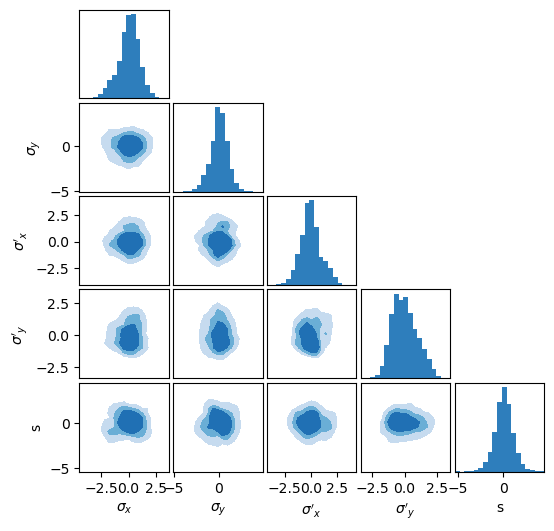

In [66]:
dims = [1,2,3,4,5,]
names = [L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", "s", "6", "7", "8", "9"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.01, 0.9, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [63]:
flat_samples = collect(flatview(unshaped.(samples.v)))[1:5,:]

flat_samples = inv(w_matrix') * flat_samples .+ w_mean

5×32120 Array{Float64,2}:
 0.151937  0.151907  0.151541  0.151593  …  0.151847  0.151561  0.151063
 0.151601  0.151637  0.151113  0.151166     0.151364  0.151214  0.151107
 4.01541   4.01754   4.01519   4.0173       4.02503   4.02975   4.0374
 4.02022   4.01972   4.03337   4.03371      4.01373   4.01675   4.01415
 2.86441   2.8645    2.88003   2.87592      2.87281   2.88121   2.90053

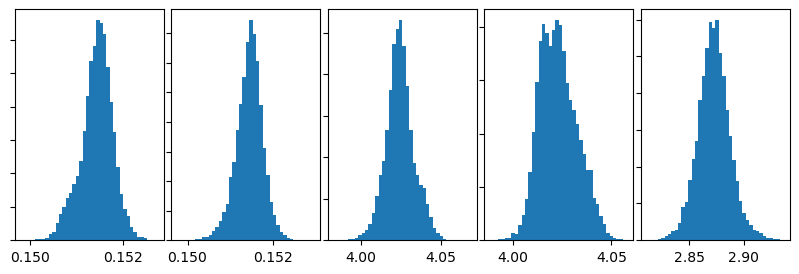

In [64]:
fig, ax = plt.subplots(1,5, figsize=(10,3))

fig.subplots_adjust(hspace=0.0, wspace=0.05)

ax[1].hist(flat_samples[1,:], bins=40, weights=samples.weight,  density=true)
ax[2].hist(flat_samples[2,:], bins=40, weights=samples.weight,  density=true)
ax[3].hist(flat_samples[3,:], bins=40, weights=samples.weight,  density=true)
ax[4].hist(flat_samples[4,:], bins=40, weights=samples.weight,  density=true)
ax[5].hist(flat_samples[5,:], bins=40, weights=samples.weight,  density=true)

for i in 1:5
   ax[i].set_yticklabels([])
end

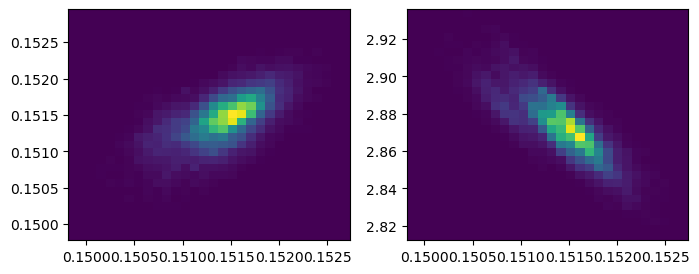

In [65]:
fig, ax = plt.subplots(1,2, figsize=(8,3))

fig.subplots_adjust(hspace=0.0, wspace=0.2)

ax[1].hist2d(flat_samples[1,:], flat_samples[2,:], bins=30, weights=samples.weight,  density=true)
ax[2].hist2d(flat_samples[1,:], flat_samples[5,:], bins=30, weights=samples.weight,  density=true);

# Partitioned Sampling

In [ ]:
tuning = AdaptiveMetropolisTuning(
    λ = 0.5,
    α = 0.2..0.3,
    β = 1.5,
    c = 1e-2..1e2,
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCInitStrategy(
    init_tries_per_chain = 10..100,
    max_nsamples_init = 600,
    max_nsteps_init = 600,
    max_time_init = Inf
)

burnin = MCMCBurninStrategy(
    max_nsamples_per_cycle = 2000,
    max_nsteps_per_cycle = 2000,
    max_time_per_cycle = Inf,
    max_ncycles = 60
);

sampler = MetropolisHastings()

nsamples = 3*10^4
nchains = 4

sampling_kwargs = (burnin = burnin, init=init, convergence=convergence, tuning=tuning, max_nsteps=nsamples, max_time=Inf);

In [ ]:
# Exploration Samples: 

exploration_sampler = MetropolisHastings()

init_2 = MCMCInitStrategy(
    init_tries_per_chain = 10..200,
    max_nsamples_init = 600,
    max_nsteps_init = 600,
    max_time_init = Inf
)

burnin_2 = MCMCBurninStrategy(
        max_nsamples_per_cycle = 1000,
        max_nsteps_per_cycle = 1000,
        max_time_per_cycle = Inf,
        max_ncycles = 10
    )
exploration_kwargs = (burnin = burnin_2, init=init_2)
n_exploration = (10^2, 40);


In [ ]:
partitioner = BAT.KDTreePartitioning(
        partition_dims = [1,2,3,4,5], # dimension indices that are considered for partition
        extend_bounds=false # "false" is appropriate for debugging, very fast tuning /convergence 
    );

In [ ]:
integrator = AHMIntegration(  
        whitening= CholeskyPartialWhitening(),
        autocorlen= GeyerAutocorLen(),
        volumetype = :HyperRectangle,
        max_startingIDs = 10000,
        max_startingIDs_fraction = 2.5,
        rect_increase = 0.1,
        warning_minstartingids = 16,
        dotrimming = true,
        uncertainty= [:cov]
    );

In [ ]:
algorithm = PartitionedSampling(
        sampler = sampler,
        exploration_sampler = exploration_sampler,
        partitioner = partitioner,
        integrator = integrator,
        exploration_kwargs = exploration_kwargs,
        sampling_kwargs = sampling_kwargs,
        n_exploration = n_exploration
    );

In [ ]:
output_sp_ms = bat_sample(posterior, (nsamples, nchains, 10), algorithm);

In [ ]:

samples_3 = output_sp_ms.result;